In [3]:
library("AzureML")
ws <- workspace()
gaulton <- download.datasets(ws, "GaltonFamilies.csv")

In [4]:
head(gaulton)

Case,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,1,78.5,67.0,75.43,4,1,male,73.2
2,1,78.5,67.0,75.43,4,2,female,69.2
3,1,78.5,67.0,75.43,4,3,female,69.0
4,1,78.5,67.0,75.43,4,4,female,69.0
5,2,75.5,66.5,73.66,4,1,male,73.5
6,2,75.5,66.5,73.66,4,2,male,72.5


In [5]:
dim(gaulton)

[1] 934   9

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/Rtmprrnzup/downloaded_packages'


Warning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrectWarning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrect

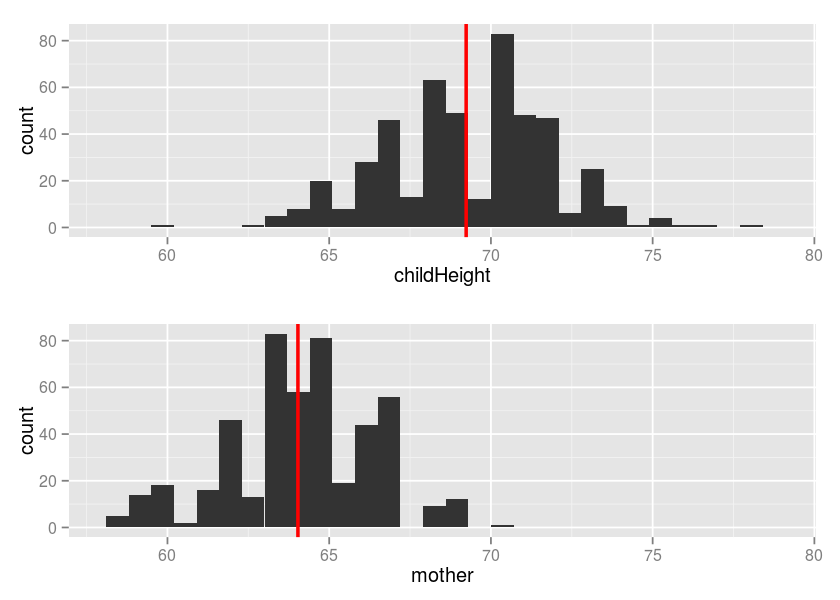

In [15]:
install.packages('gridExtra')
require(repr)
options(repr.plot.width=7, repr.plot.height=5)
hist.plot = function(df, col, bw, max, min){
    ggplot(df, aes_string(col)) +
      geom_histogram(binwidth = bw) +
      xlim(min, max)
}

hist.family = function(df, col1, col2, num.bin = 30){
    require(ggplot2)
    require(gridExtra)
    
    ## Compute bin width
    max = max(max(df[, col1]), max(df[, col2]))
    min = min(min(df[, col1]), min(df[, col2]))
    bin.width = (max - min)/num.bin
    
    ## Create a first histogram
    p1 = hist.plot(df, col1, bin.width, max, min)
    p1 = p1 + geom_vline(xintercept = mean(df[, col1]),
                          color = 'red', size = 1)
    
    ## Create a second histogram
    p2 = hist.plot(df, col2, bin.width, max, min)
    p2 = p2 + geom_vline(xintercept= mean(df[, col2]),
                          color = 'red', size = 1)
    
    ## Now stack the plots
    grid.arrange(p1, p2, nrow = 2, ncol = 1)
}

sons = gaulton[gaulton$gender == 'male', ]
hist.family(sons, 'childHeight', 'mother')

Warning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrectWarning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrect

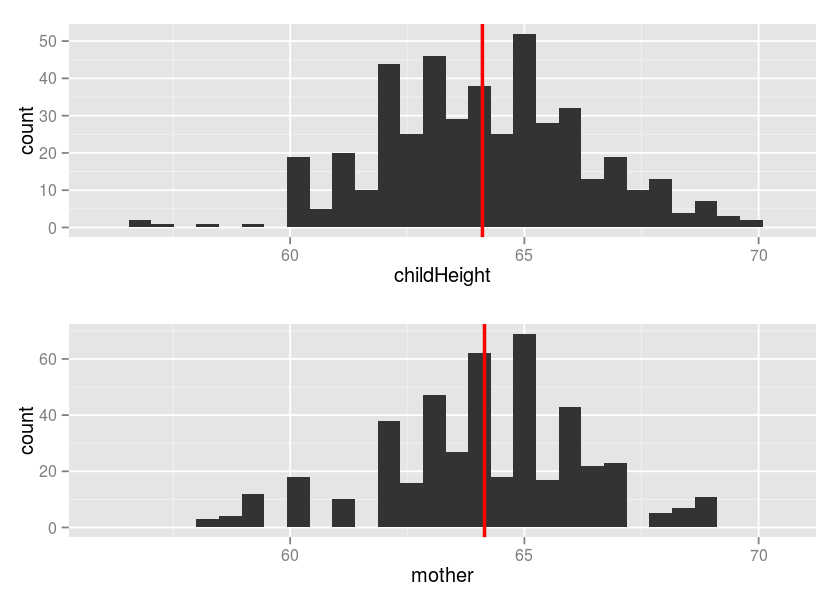

In [18]:
daughters = gaulton[gaulton$gender == 'female', ]
hist.family(daughters, 'childHeight', 'mother')

Warning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrectWarning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrect


	Welch Two Sample t-test

data:  df[, col1] and df[, col2]
t = -32.5565, df = 945.969, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.514333 -4.887331
sample estimates:
mean of x mean of y 
 64.03326  69.23410 



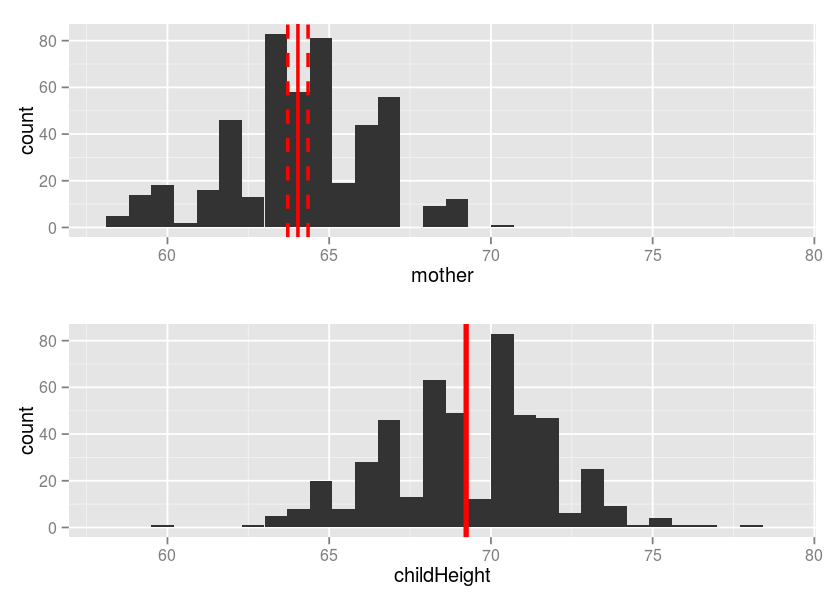

In [19]:
families.test <- function(df, col1, col2, paired = TRUE){
    t.test(df[, col1], df[, col2], paired = paired)
}

hist.family.conf <- function(df, col1, col2, num.bin = 30, paired = FALSE){
    require(ggplot2)
    require(gridExtra)
    
    ## Compute bin width
    max <- max(max(df[, col1]), max(df[, col2]))
    min <- min(min(df[, col1]), min(df[, col2]))
    bin.width <- (max - min)/num.bin
    
    mean1 <- mean(df[, col1])
    mean2 <- mean(df[, col2])
    t <- t.test(df[, col1], df[, col2], paired = paired)
    pv1 <- mean2 + t$conf.int[1]
    pv2 <- mean2 + t$conf.int[2]
    
    ## Plot a histogram
    p1 <- hist.plot(df, col1, bin.width, max, min)
    p1 <- p1 + geom_vline(xintercept = mean1,
                          color = 'red', size = 1) +
               geom_vline(xintercept = pv1,
                          color = 'red', size = 1, linetype = 2) +
               geom_vline(xintercept = pv2,
                          color = 'red', size = 1, linetype = 2)
    
    ## A simple boxplot
    p2 <- hist.plot(df, col2, bin.width, max, min)
    p2 <- p2 + geom_vline(xintercept = mean2,
                          color = 'red', size = 1.5)
    
    ## Now stack the plots
    grid.arrange(p1, p2, nrow = 2)
    
    print(t)
}

hist.family.conf(sons, 'mother', 'childHeight')

Warning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrectWarning message:
In loop_apply(n, do.ply): position_stack requires constant width: output may be incorrect


	Welch Two Sample t-test

data:  df[, col1] and df[, col2]
t = 0.2922, df = 902.412, p-value = 0.7702
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2561317  0.3457564
sample estimates:
mean of x mean of y 
 64.14879  64.10397 



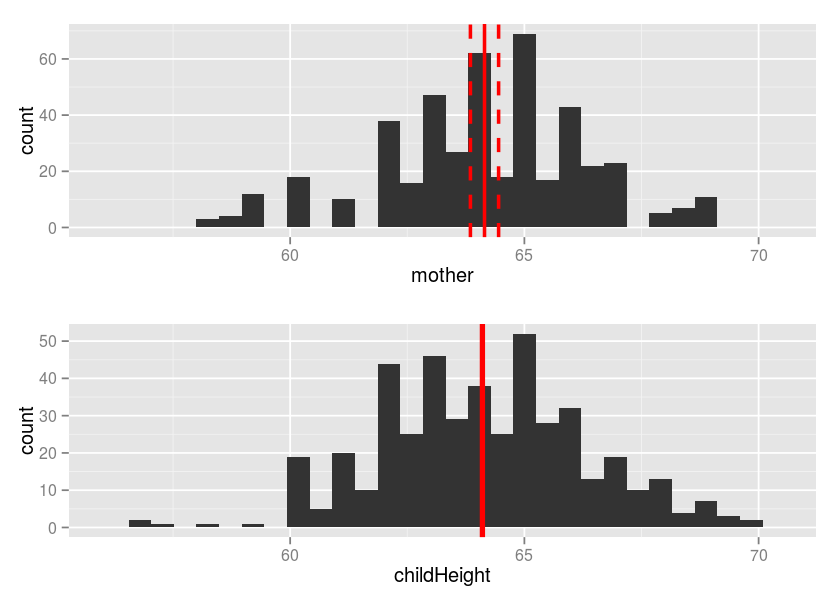

In [20]:
hist.family.conf(daughters, 'mother', 'childHeight')